# Obtendo Dados do INMET

- Obtenção do inventário de estações do INMET
- Download de dados
- Exportação dos dados

In [16]:
import hydrobr
import geopandas as gpd
from shapely.geometry import Point

In [17]:
def select_stations_area(area, list_stations, buffer=0):
    """
    Seleciona as estações que estão dentro de uma área de interesse.
    :param area: Área de interesse como um objeto GeoPandas
    :param list_stations: Lista de estações como objeto geopandas
    :param buffer: Float, Opcional, Padrão = 0 - Buffer na área de interesse
    :return: Retorna um objeto Geopandas com as estações selecionadas
    """
    #Converte o formato das colunas Latitude e Longitude
    if list_stations.Longitude.dtype != float:
        list_stations.Longitude = list_stations.Longitude.astype(float)
    if list_stations.Latitude.dtype != float:
        list_stations.Latitude = list_stations.Latitude.astype(float)   
    
    # Cria uma Geometria de Pontos
    pontos=[Point(x) for x in zip(list_stations.Longitude,list_stations.Latitude)]
    crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True} #SC WGS 84
    
    # Define o sistema de coordenadas como WGS 84
    list_stations=gpd.GeoDataFrame(list_stations,crs=crs,geometry=pontos)
    
    # Seleciona as estações que estão dentro da bacia
    list_stations = list_stations[list_stations.geometry.within(area.geometry[0].buffer(buffer))]
    return list_stations

<AxesSubplot:>

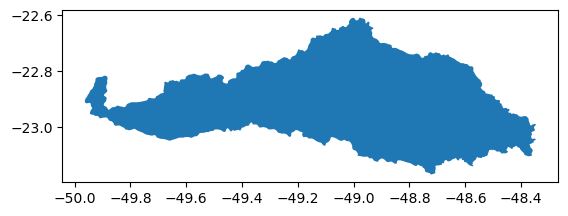

In [18]:
#Abrindo o shapefile da área de interesse
area = gpd.read_file(r'/home/soares/Documentos/GitHub/pratica_hydrobr/hydrobr-aplications/Parte 1/shapefiles/limitepardolatlong/limite pardo latlong.shp')
#Plotando o shapefile da área de interesse
area.plot()

In [ ]:
# Obtendo as estações automaticas e convencionais
lista_inmet = hydrobr.get_data.INMET.list_stations() 
# Filtrando as estações por área
lista_inmet_pardo  = select_stations_area(area,lista_inmet)
#Visualizando o GeoDataFrame
lista_inmet_pardo

: 

In [ ]:
lista_inmet_pardo2 = lista_inmet_pardo.dropna()

: 

In [24]:
# Definindo a área de interesse como base do gráfico
base = area.plot(color='white', edgecolor='black')
# Plotando as estações automaticas em azul
lista_inmet_pardo[lista_inmet_pardo.Type == 'Automatic'].plot(ax=base, marker='o', color='blue', markersize=8)
# Plotando as estações convencionais em vermelho
lista_inmet_pardo[lista_inmet_pardo.Type == 'Conventional'].plot(ax=base, marker='o', color='red', markersize=8)

/home/soares/.local/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 640x480 with 1 Axes>

In [ ]:
# Download dos dados horários de uma estação
dados_avare = hydrobr.get_data.INMET.hourly_data('A554')
# Visualização do formato do dataframe de saída
dados_avare.head()

: 

In [9]:
import pandas as pd
# Criando dataframes vazios
dados_temperatura=pd.DataFrame()
dados_prec=pd.DataFrame()
#Selecionando apenas as estações automaticas
lista_selecionada = lista_inmet_pardo[lista_inmet_pardo.Type == 'Automatic']
#Fazendo o download e salvando apenas as variáveis de precipitação e temperatura
for code in lista_selecionada.Code.to_list():
    # Baixa os dados diários das estações a partir do código
    dados = hydrobr.get_data.INMET.daily_data(code)
    # Salva apenas a coluna Tmean no dataframe criado, com o código da estação como nome
    dados_temperatura = pd.concat([dados_temperatura,dados.Tmean.rename(code)], axis=1)
    # Salva apenas a coluna Prec no dataframe criado, com o código da estação como nome
    dados_prec = pd.concat([dados_prec,dados.Prec.rename(code)], axis=1)

In [10]:
from plotly.offline import plot
gantt_fig = hydrobr.Plot.gantt(dados_temperatura)
#Atualizando o layout da figura
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Ano',
    yaxis_title = 'Código da Estação',
    font=dict(family="Courier New, monospace", size=12))

#Plotando
plot(gantt_fig,filename='Gantt_Pardo_Temp' + '.html')

'Gantt_Doce_Temp.html'